# MACHINE LEARNING PROJECT

## Fotoğraflardaki El Yazısı Rakamları Otomatik Tanıma ve Anlamlandırma

Projemizde kullanacağımız MNIST elyazısı rakamları veritabanında(sklearn içinde gelmektedir) 784 feature sütunu mevcut (784 dimensions), ve training set olarak 60,000 örnek veri ve a 10,000 örneklik test seti bulunmaktadır.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için gerekli...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Bu işlem 1-2 dk sürebilir..
mnist = fetch_openml('mnist_784')

In [2]:
mnist.data.shape


(70000, 784)

### Mnist veriseti içindeki rakam fotoğraflarını görmek için bir fonksiyon tanımlayalım:

In [3]:
# Parametre olarak dataframe ve ilgili veri fotoğrafının index numarasını alsın..
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

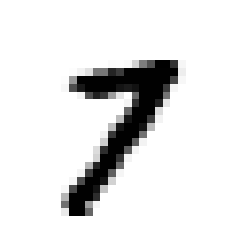

In [8]:
# Örnek kullanım:
showimage(mnist.data, 0)

70,000 image dosyası, her bir image için 784 boyut(784 feature) mevcut.

### Split Data -> Training Set ve Test Set

In [9]:

# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [10]:
type(train_img)

pandas.core.frame.DataFrame

In [11]:
# Rakam tahminlerimizi check etmek için train_img dataframeini kopyalıyoruz, çünkü az sonra değişecek..
test_img_copy = test_img.copy()

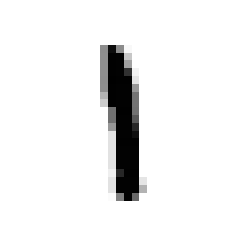

In [14]:
showimage(test_img_copy, 2)

### Verilerimizi Scale etmemiz gerekiyor:

Çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor bu nedenle mutlaka scaling işleminden geçiriyoruz. 
Bu amaçla da StandardScaler kullanıyoruz...

In [15]:
scaler = StandardScaler()

# Scaler'ı sadece training set üzerinde fit yapmamız yeterli..
scaler.fit(train_img)

# Ama transform işlemini hem training sete hem de test sete yapmamız gerekiyor..
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

### PCA işlemini uyguluyoruz..

Variance'ın 95% oranında korunmasını istediğimizi belirtiyoruz..

In [16]:
# Make an instance of the Model
pca = PCA(.95)

In [17]:
# PCA'i sadece training sete yapmamız yeterli: (1 dk sürebilir)
pca.fit(train_img)

PCA(n_components=0.95)

In [18]:
# Bakalım 784 boyutu kaç boyuta düşürebilmiş (%95 variance'ı koruyarak tabiiki)
print(pca.n_components_)

327


In [19]:
# Şimdi transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 327'e düşürelim:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

## 2. Aşama

Şimdi 2. Makine Öğrenmesi modelimiz olan Logistic Regression modelimizi PCA işleminden geçirilmiş veris etimiz üzerinde uygulayacağız.

In [20]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı seçerek logisticregression nesnemizi oluşturuyoruz.
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

### LogisticRegression Modelimizi train datamızı kullanarak eğitiyoruz:

In [21]:
# (Birkaç dk sürebilir)
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

#### Modelimiz eğitildi şimdi el yazısı rakamları makine öğrenmesi ile tanıma işlemini gerçekletirelim:

In [23]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

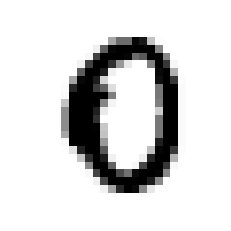

In [22]:
showimage(test_img_copy, 0)

In [25]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

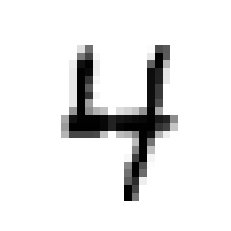

In [24]:
showimage(test_img_copy, 1)

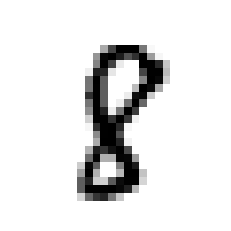

In [26]:
showimage(test_img_copy, 9900)

In [27]:
logisticRegr.predict(test_img[9900].reshape(1,-1))

array(['8'], dtype=object)

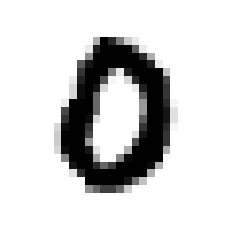

In [28]:
showimage(test_img_copy, 9999)

In [29]:
logisticRegr.predict(test_img[9999].reshape(1,-1))

array(['0'], dtype=object)

### Modelimizin doğruluk oranı (accuracy) ölçmek 

In [30]:
# Modelimizin doğruluk oranı (accuracy) ölçmek için score metodunu kullanacağız:

logisticRegr.score(test_img, test_lbl)

0.9184

### Sonuç ve Değerlendirme

Bu projede PCA kullanarak logistic regression tarafından yapay zekanın eğitilme süresini önemli ölçüde kısalttık. Ben %95 variance korumayı hedefledim. Siz % 95  variance'ı daha düşük seviyelere çekerek sürenin ne ölçüde kısaltıdığını kendiniz deneyerek bulabilirsiniz. 10 tane digit için yapay zekanın eğitim süresini çok büyük ölçüde kısaltan PCA algoritması yüzlerce hatta binlerce değişik nesne tipi için yapay zekanın eğitim süresini saatler mertebesinde kısaltacak ve bu da sizin programlarınızın çok daha hızlı çalışmasını sağlayacaktır.


Bu proje ile birbirinden tamamen farklı 2 makine öğrenme modelini bir araya getirip günlük hayatta karşımıza çıkabilecek
bir işi bilgisayarımıza yapay zeka programı yazarak gerçekleştirdik ! 

Gerçekten düşününce süper bir teknoloji, el yazısıyla yazılmış rakamları otomatik olarak tanıyıp bunu bilgisayarın anlayabileceği dijital bir sayı karakterine dönüştürebiliyoruz! Bira üzerinde düşünürseniz böyle bir teknolojiyi kullanarak çok çeşitli icatlar ve ürünler ortaya çıkarabilirsiniz. Mesela... bu projeyi biraz daha geliştirip (alfabedeki harfleri de ekleyip) otomatik olarak el yazısı ile yazılmış dilekçeleri okuyan ve dijital Microsoft Word dosyasına veya PDF dosyasına dönüştüren bir software oluşturabilirsiniz. İnsanlar fotoğrafını çekerek oluşturduğu bir dilekçeyi otomatik olarak sisteminize yükleyebilir ve siz de veritabanına metin olarak kaydedebilirsiniz. Aradaki bir çok manuel adımı yapay zeka sayesinde atlamış olursunuz!